# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset loading

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head(10)

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0
5,6,34,2.0,Aadhar,779784,902040,0,0,0,1
6,7,27,2.0,Aadhar,449268,847896,0,0,0,0
7,8,27,2.0,Aadhar,582036,905604,0,0,0,1
8,9,30,1.0,Aadhar,712956,866292,0,0,0,0
9,10,46,2.0,Aadhar,554988,761724,3,0,0,1


In [3]:
test_data = pd.read_csv("test.csv")
test_data.head(10)

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
0,7001,29,1.0,Aadhar,636936,768240,2,2,0
1,7002,28,1.0,Aadhar,548988,693060,3,3,0
2,7003,28,1.0,Aadhar,651756,936600,0,0,0
3,7004,45,2.0,Aadhar,614676,744840,4,3,0
4,7005,48,1.0,Aadhar,625236,839400,0,0,0
5,7006,41,1.0,Aadhar,608436,793200,2,2,0
6,7007,37,1.0,Aadhar,589740,894000,22,12,0
7,7008,29,1.0,Aadhar,708156,844260,0,0,0
8,7009,42,1.0,Aadhar,796584,978000,0,0,0
9,7010,27,1.0,Aadhar,752556,920724,0,0,0


# Preprosessing

In [4]:
# checking null values in train dataset
train_data.isnull().sum()

loan_id               0
age                   0
education           245
proof_submitted       0
loan_amount           0
asset_cost            0
no_of_loans           0
no_of_curr_loans      0
last_delinq_none      0
loan_default          0
dtype: int64

In [5]:
# checking null values in test dataset
test_data.isnull().sum()

loan_id              0
age                  0
education           92
proof_submitted      0
loan_amount          0
asset_cost           0
no_of_loans          0
no_of_curr_loans     0
last_delinq_none     0
dtype: int64

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_id           7000 non-null   int64  
 1   age               7000 non-null   int64  
 2   education         6755 non-null   float64
 3   proof_submitted   7000 non-null   object 
 4   loan_amount       7000 non-null   int64  
 5   asset_cost        7000 non-null   int64  
 6   no_of_loans       7000 non-null   int64  
 7   no_of_curr_loans  7000 non-null   int64  
 8   last_delinq_none  7000 non-null   int64  
 9   loan_default      7000 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 547.0+ KB


In [7]:
train_data.describe()

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
count,7000.000000,7000.000000,6755.000000,7.000000e+03,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,36.096571,1.561954,6.633552e+05,9.162998e+05,2.853286,1.371143,0.013286,0.400000
std,2020.870275,7.587700,0.496184,1.498128e+05,2.144922e+05,5.471932,2.189278,0.114504,0.489933
min,1.000000,21.000000,1.000000,1.678800e+05,4.733520e+05,0.000000,0.000000,0.000000,0.000000
25%,1750.750000,29.000000,1.000000,5.777880e+05,7.979010e+05,0.000000,0.000000,0.000000,0.000000
50%,3500.500000,36.000000,2.000000,6.571080e+05,8.584260e+05,0.000000,0.000000,0.000000,0.000000
75%,5250.250000,43.000000,2.000000,7.373640e+05,9.576750e+05,3.000000,2.000000,0.000000,1.000000
max,7000.000000,50.000000,2.000000,1.781376e+06,2.419200e+06,109.000000,33.000000,1.000000,1.000000


In [8]:
test_data.describe()

,loan_id,age,education,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none
count,3000.000000,3000.000000,2908.000000,3.000000e+03,3.000000e+03,3000.000000,3000.000000,3000.000000
mean,8500.500000,36.111000,1.563618,6.629294e+05,9.106000e+05,2.819000,1.374333,0.014333
std,866.169729,7.467347,0.496022,1.451009e+05,2.070278e+05,5.329575,2.218825,0.118881
min,7001.000000,21.000000,1.000000,1.696800e+05,4.706040e+05,0.000000,0.000000,0.000000
25%,7750.750000,30.000000,1.000000,5.801880e+05,7.930710e+05,0.000000,0.000000,0.000000
50%,8500.500000,36.000000,2.000000,6.541560e+05,8.569080e+05,0.000000,0.000000,0.000000
75%,9250.250000,42.000000,2.000000,7.315590e+05,9.501360e+05,4.000000,2.000000,0.000000
max,10000.000000,50.000000,2.000000,1.576920e+06,2.358180e+06,92.000000,32.000000,1.000000


# Visualization

<AxesSubplot:>

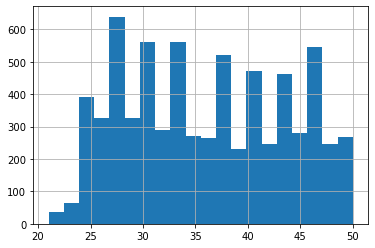

In [9]:
# let distribustion plot(histogram) for age
train_data["age"].hist(bins = 20)

<AxesSubplot:>

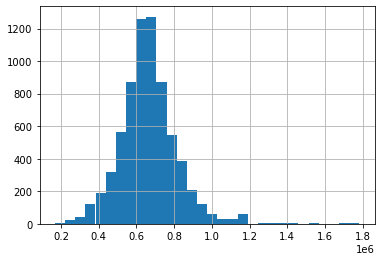

In [10]:
# Loan amount 
train_data["loan_amount"].hist(bins = 30)

<AxesSubplot:>

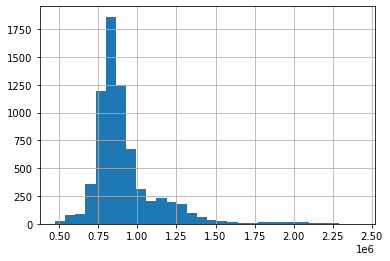

In [11]:
#asset_cost
train_data["asset_cost"].hist(bins = 30)

In [12]:
# education
train_data["education"].value_counts()

2.0    3796
1.0    2959
Name: education, dtype: int64

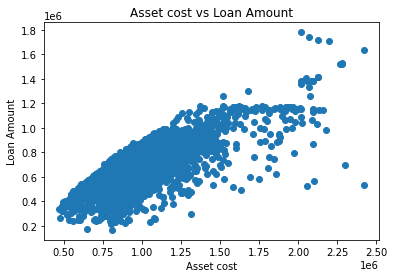

In [13]:
# asset_cost vs loan amount
plt.scatter("asset_cost","loan_amount",data = train_data)
plt.xlabel("Asset cost")
plt.ylabel("Loan Amount")
plt.title("Asset cost vs Loan Amount")
plt.show()

In [14]:
train_data["education"].value_counts()

2.0    3796
1.0    2959
Name: education, dtype: int64

In [15]:
# imputing education with most occur value 2.o
train_data["education"].fillna(2.0,inplace = True)

In [16]:
train_data.isnull().sum()

loan_id             0
age                 0
education           0
proof_submitted     0
loan_amount         0
asset_cost          0
no_of_loans         0
no_of_curr_loans    0
last_delinq_none    0
loan_default        0
dtype: int64

In [17]:
test_data["education"].value_counts()

2.0    1639
1.0    1269
Name: education, dtype: int64

In [18]:
# imputing education with most occur value 2.o
test_data["education"].fillna(2.0,inplace = True)

In [19]:
test_data.isnull().sum()

loan_id             0
age                 0
education           0
proof_submitted     0
loan_amount         0
asset_cost          0
no_of_loans         0
no_of_curr_loans    0
last_delinq_none    0
dtype: int64

# Feature engineering

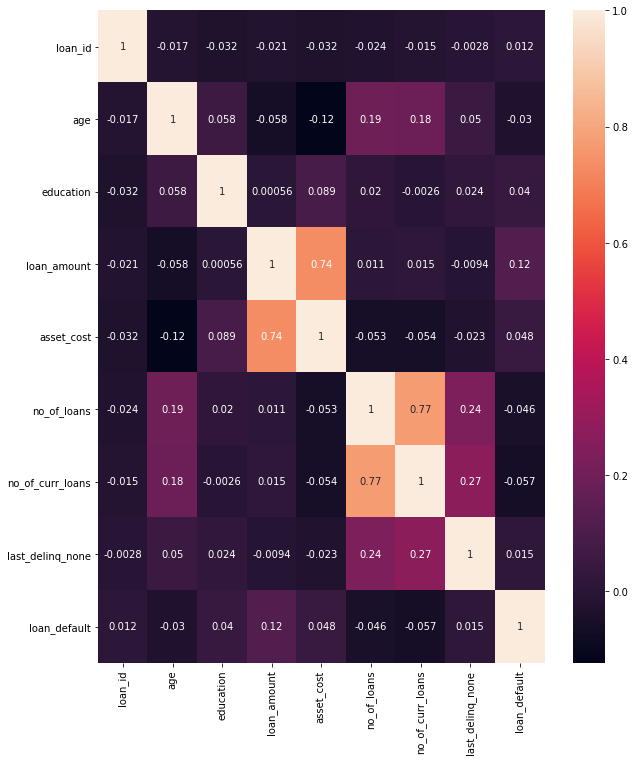

In [20]:
 # let us create correlation matirx
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,12))
sns.heatmap(train_data.corr(),annot = True)
plt.show()

In [21]:
# we will create  loan_amount_ratio using  loan_amount and asset_cost 
# as assest cost and loan amount is highly correlated feature!!

In [22]:
# let create new feature loan_amount_ratio
train_data["loan_amount_ratio"] = train_data["asset_cost"]/ train_data["loan_amount"]

In [23]:
train_data.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default,loan_amount_ratio
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0,1.627957
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0,1.141222
2,3,30,2.0,VoterID,642936,826092,0,0,0,1,1.284874
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0,1.246958
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0,1.668597


In [24]:
# let us drop asset_cost and loan_amount
train_data = train_data.drop(["asset_cost","loan_amount"],axis = 1)

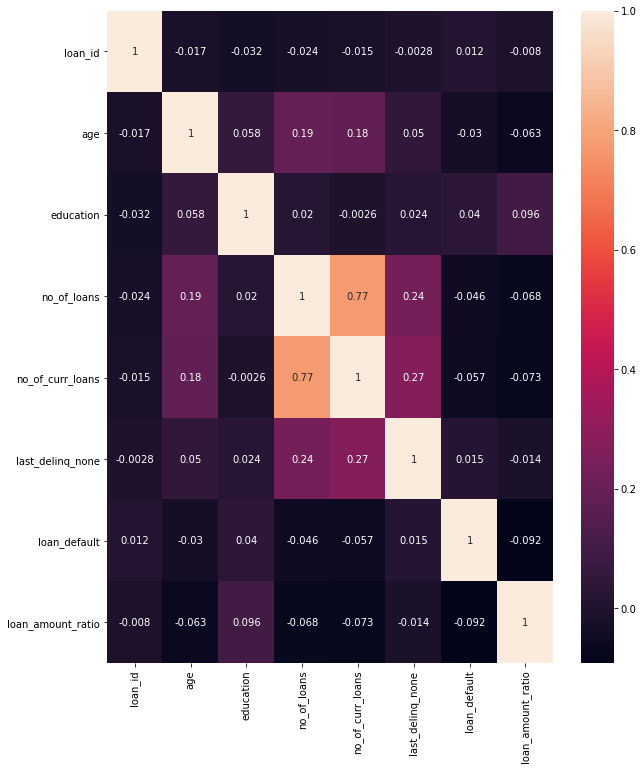

In [25]:
plt.figure(figsize = (10,12))
sns.heatmap(train_data.corr(),annot = True)
plt.show()

In [26]:
# we will create  loan_closed_no using  no_of_loans and no_of_curr_loans 
# as no_of_loans and no_of_curr_loans is highly correlated feature!!

In [27]:
# let create new feature loan_closed_no
train_data["loan_closed_no"] = train_data["no_of_loans"] - train_data["no_of_curr_loans"]

In [28]:
train_data["loan_closed_no"].value_counts()

0     4632
2      684
1      549
3      311
4      186
5      121
6      101
7       69
8       55
9       50
10      40
12      34
11      26
13      22
16      14
15      13
17      13
18      10
19       9
14       9
28       6
24       6
20       6
23       5
21       3
32       3
30       2
27       2
61       2
41       2
44       2
22       1
34       1
98       1
53       1
29       1
25       1
60       1
36       1
31       1
35       1
43       1
51       1
71       1
Name: loan_closed_no, dtype: int64

In [ ]:
# let us drop no_of_loans and no_of_curr_loans
train_data = train_data.drop(["no_of_curr_loans","no_of_loans"],axis = 1)

In [ ]:
plt.figure(figsize = (10,12))
sns.heatmap(train_data.corr(),annot = True)
plt.show()

In [ ]:
# loan id is no useful feature we will drop
train_data = train_data.drop("loan_id",axis = 1)

In [ ]:
# proof_submitted  feature
train_data["proof_submitted"].value_counts()

In [ ]:
# transform categorical value into numeric
from sklearn.preprocessing import LabelEncoder  
label_encoder = LabelEncoder()
train_data["proof_submitted"] = label_encoder.fit_transform(train_data["proof_submitted"])

In [ ]:
train_data.head()

In [ ]:
# let drop loan_id column
test_data = test_data.drop("loan_id",axis = 1)

In [ ]:
test_data.head()

In [ ]:
# let create new feature loan_amount_ratio
test_data["loan_amount_ratio"] = test_data["asset_cost"]/ test_data["loan_amount"]

In [ ]:
# let us drop asset_cost and loan_amount
test_data = test_data.drop(["asset_cost","loan_amount"],axis = 1)

In [ ]:
test_data.head()

In [ ]:
# let create new feature loan_closed_no
test_data["loan_closed_no"] = test_data["no_of_loans"] - test_data["no_of_curr_loans"]

In [ ]:
# let us drop no_of_loans and no_of_curr_loans
test_data = test_data.drop(["no_of_curr_loans","no_of_loans"],axis = 1)

In [ ]:
plt.figure(figsize = (10,12))
sns.heatmap(test_data.corr(),annot = True)
plt.show()

In [ ]:
test_data["proof_submitted"] = label_encoder.fit_transform(test_data["proof_submitted"])

In [ ]:
test_data.head()

In [ ]:
# for age we will create age group ....bins !!!!!!!!!!!!!
#Age Bins : using qcut
test_data["age"] = pd.qcut(test_data['age'].astype(int), 5) # creating 5 bins

In [ ]:
test_data.head()

In [ ]:
test_data.info()

In [ ]:
test_data["age"] = label_encoder.fit_transform(test_data["age"])

In [ ]:
test_data.head()

In [ ]:
test_data["loan_amount_ratio_log"] = np.log(test_data["loan_amount_ratio"])

In [ ]:
test_data = test_data.drop("loan_amount_ratio",axis = 1)
test_data.head()

In [ ]:
# for age we will create age group ....bins !!!!!!!!!!!!!
#Age Bins : using qcut
train_data["age"] = pd.qcut(train_data['age'].astype(int), 5) # creating 5 bins

In [ ]:
train_data["age"] = label_encoder.fit_transform(train_data["age"])

In [ ]:
train_data.head()

# Model creation

In [ ]:
# let us Define X and Y first

X = train_data.drop("loan_default",axis = 1)
Y = train_data["loan_default"]

In [ ]:
# let scale using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
test_data_scale = scaler.transform(test_data)

In [ ]:
print('X_train shape: {}'.format(X_scale.shape))
print('y_train shape: {}'.format(Y.shape))
print('X_test shape: {}'.format(test_data_scale.shape))

In [ ]:
# Logistic Model
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_model = LogisticRegression(random_state = 42)

In [ ]:
logistic_model.fit(X_scale,Y)

In [ ]:
# PREDICITING FROM THE MODEL
y_pred_logistic = logistic_model.predict(X_scale)
y_pred_logistic

In [ ]:
# ACCURACY
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("ACCURACY of logistic model is:", accuracy_score(Y, y_pred_logistic))

In [ ]:
# let us check classification report
print(classification_report(Y, y_pred_logistic))

# Predicting for test data

In [ ]:
y_pred_test = logistic_model.predict(test_data_scale)

In [ ]:
y_pred_test

In [ ]:
# sumbission
submission_dataframe = pd.read_csv("sample_submission.csv")
submission_dataframe["loan_default"] = y_pred_test
submission_dataframe.to_csv("loan_default_pred_457.csv",index=False)

In [ ]:
# let us train model using random forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=100)

In [ ]:
random_forest_model.fit(X_scale, Y)

In [ ]:
# PREDICITING FROM THE MODEL
y_pred_train = random_forest_model.predict(X_scale)

In [ ]:
# accuracy
print("ACCURACY of random forest model is:", accuracy_score(Y, y_pred_train))

In [ ]:
y_pred_test_rf= random_forest_model.predict(test_data_scale)

# sumbission
submission_dataframe = pd.read_csv("sample_submission.csv")
submission_dataframe["loan_default"] = y_pred_test_rf
submission_dataframe.to_csv("loan_default_pred_v14.csv",index=False)

# AdaBoost

In [ ]:
# import library
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_boost_model = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.1)
ada_boost_model.fit(X_scale, Y)

In [ ]:
# Predicitng from the model
y_pred_ada_boost = ada_boost_model.predict(X_scale)

In [ ]:
# Accuracy
print("Accuracy:",accuracy_score(Y, y_pred_ada_boost))

In [ ]:
y_pred_test_ada_boost= ada_boost_model.predict(test_data_scale)

# sumbission
submission_dataframe = pd.read_csv("sample_submission.csv")
submission_dataframe["loan_default"] = y_pred_test_ada_boost
submission_dataframe.to_csv("loan_default_pred_v124.csv",index=False)

# Ensemble

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
forest = RandomForestClassifier(n_estimators =500, criterion='entropy', oob_score=True, random_state=1,n_jobs=-1)

In [ ]:
xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.95,
                     colsample_bytree=0.95, reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=1)

In [ ]:
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=0)

In [ ]:
eclf = VotingClassifier(estimators=[('forest', forest), ('xgb', xgb1), ('adaboost', ada)], voting='hard')

In [ ]:
eclf.fit(X_scale, Y)

In [ ]:
y_pred_ensamble= eclf.predict(test_data_scale)

# sumbission
submission_dataframe = pd.read_csv("sample_submission.csv")
submission_dataframe["loan_default"] = y_pred_ensamble
submission_dataframe.to_csv("loan_default_pred_ensamble.csv",index=False)